In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./df_분리/전용면적_85이하.csv')
df.drop('건물면적(㎡)',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

## 건물면적(㎡) 컬럼 제거
만약 주택 가격을 예측하는 모델이 주택 면적 열을 기준으로 데이터를 분리한다면, 주택 면적 열을 제외해야 할까요?

모델을 구축할 때 주택 면적 열을 기준으로 데이터를 분리하는 것은 일반적인 접근 방식입니다. 이는 동일한 면적 범위 내에서 주택 가격을 비교하고 예측하기 위함입니다. 따라서, 주택 면적 열은 모델에 포함되지 않아야 할 것입니다.

만약 주택 면적 열을 모델에 포함한다면, 이는 모델이 이미 면적에 대한 정보를 가지고 있다고 가정하는 것입니다. 이는 모델이 주택 가격을 예측하는 데에 있어서 실제 데이터에 대한 일반화(generalization) 능력을 감소시킬 수 있습니다. 따라서, 주택 면적 열은 모델에서 제외하는 것이 좋습니다.

주택 가격을 예측하는 모델에서는 다른 독립 변수들을 사용하여 주택 가격과의 관계를 모델링해야 합니다. 주택 면적 열은 독립 변수 중 하나일 수 있지만, 모든 독립 변수들을 고려하여 종속 변수인 주택 가격과의 관계를 분석하는 것이 중요합니다. 이를 통해 보다 정확하고 신뢰할 수 있는 주택 가격 예측 모델을 구축할 수 있습니다.

# OLS - Scaling 후

## R_OLS_1

In [2]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365633
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:13:12                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0685      0.010    509.839      0.000       5.049       5.088
층                     0.3391      0.004     85.364      0.000       0.331       0.347
KOSPI종가              -0.0383      0.008     -4.910      0.000      -0.054      -0.023
Fed기준금리              -0.1682      0.005    -36.900      0.000      -0.177      -0.159
국제유가(Dubai)($/배럴)     0.1756      0.004     39.416      0.000       0.167       0.184
부동산거래량                0.0438      0.002     18.378      0.000       0.039       0.048
국고채5년(평균)            -0.3360      0.024    -13.999      0.000      -0.383      -0.289
국고채10년(평균)            0.3123      0.018     17.668      0.000       0.278       0.347
회사채3년(평균)             0.1537      0.007     21.802      0.000       0.140       0.168
CD91물(평균)            -0.0752      0.010     -7.339      0.000      -0.095      -0.055
BOK기준금리              -0.1307      0.009    -15.200      0.000      -0.148      -0.114
건물연식                 -0.2813      0.002   -132.404      0.000      -0.285      -0.277
GDP대비가계부채비율          -0.0843      0.007    -11.548      0.000      -0.099      -0.070
환율종가                  0.0212      0.004      5.534      0.000       0.014       0.029
선행지수순환변동치             0.1755      0.006     30.648      0.000       0.164       0.187
EPU                  -0.0168      0.002     -7.110      0.000      -0.021      -0.012
장단기금리spread          -0.3098      0.011    -28.571      0.000      -0.331      -0.289
금값종가                  0.0151      0.007      2.109      0.035       0.001       0.029
LTV                  -0.3347      0.003   -126.951      0.000      -0.340      -0.330
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_1

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [4]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      5.408849                  층
1    152.533253            KOSPI종가
2     53.138961            Fed기준금리
3     65.979004  국제유가(Dubai)($/배럴)
4     10.816380             부동산거래량
5   1162.722383          국고채5년(평균)
6    831.212622         국고채10년(평균)
7    124.431761          회사채3년(평균)
8    276.109488          CD91물(평균)
9    253.788279            BOK기준금리
10     5.717074               건물연식
11   107.627505        GDP대비가계부채비율
12    27.606443               환율종가
13   120.401195          선행지수순환변동치
14     5.568698                EPU
15   201.357165        장단기금리spread
16    66.440167               금값종가
17    30.208964                LTV


### 국고채5년(평균) 컬럼 삭제

In [5]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## R_OLS_2

In [6]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365634
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:14:53                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1324      0.009    581.610      0.000       5.115       5.150
층                     0.3391      0.004     85.335      0.000       0.331       0.347
KOSPI종가              -0.0375      0.008     -4.803      0.000      -0.053      -0.022
Fed기준금리              -0.1852      0.004    -42.252      0.000      -0.194      -0.177
국제유가(Dubai)($/배럴)     0.1761      0.004     39.523      0.000       0.167       0.185
부동산거래량                0.0443      0.002     18.585      0.000       0.040       0.049
국고채10년(평균)            0.1156      0.011     10.982      0.000       0.095       0.136
회사채3년(평균)             0.1236      0.007     18.352      0.000       0.110       0.137
CD91물(평균)            -0.1322      0.009    -13.991      0.000      -0.151      -0.114
BOK기준금리              -0.1829      0.008    -23.509      0.000      -0.198      -0.168
건물연식                 -0.2815      0.002   -132.448      0.000      -0.286      -0.277
GDP대비가계부채비율          -0.0578      0.007     -8.236      0.000      -0.072      -0.044
환율종가                  0.0412      0.004     11.573      0.000       0.034       0.048
선행지수순환변동치             0.1825      0.006     32.034      0.000       0.171       0.194
EPU                  -0.0239      0.002    -10.367      0.000      -0.028      -0.019
장단기금리spread          -0.4078      0.008    -48.974      0.000      -0.424      -0.391
금값종가                 -0.0092      0.007     -1.336      0.181      -0.023       0.004
LTV                  -0.3273      0.003   -126.207      0.000      -0.332      -0.322
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 금값종가 컬럼 삭제

In [7]:
X_scaled.drop('금값종가', axis=1, inplace=True)

## R_OLS_3

In [8]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365635
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:15:48                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1306      0.009    589.111      0.000       5.114       5.148
층                     0.3391      0.004     85.332      0.000       0.331       0.347
KOSPI종가              -0.0404      0.008     -5.386      0.000      -0.055      -0.026
Fed기준금리              -0.1838      0.004    -43.182      0.000      -0.192      -0.175
국제유가(Dubai)($/배럴)     0.1770      0.004     40.201      0.000       0.168       0.186
부동산거래량                0.0446      0.002     18.834      0.000       0.040       0.049
국고채10년(평균)            0.1176      0.010     11.286      0.000       0.097       0.138
회사채3년(평균)             0.1235      0.007     18.340      0.000       0.110       0.137
CD91물(평균)            -0.1315      0.009    -13.943      0.000      -0.150      -0.113
BOK기준금리              -0.1839      0.008    -23.719      0.000      -0.199      -0.169
건물연식                 -0.2815      0.002   -132.450      0.000      -0.286      -0.277
GDP대비가계부채비율          -0.0632      0.006    -10.953      0.000      -0.075      -0.052
환율종가                  0.0418      0.004     11.794      0.000       0.035       0.049
선행지수순환변동치             0.1841      0.006     32.935      0.000       0.173       0.195
EPU                  -0.0237      0.002    -10.302      0.000      -0.028      -0.019
장단기금리spread          -0.4087      0.008    -49.217      0.000      -0.425      -0.392
LTV                  -0.3275      0.003   -126.424      0.000      -0.333      -0.322
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_3

In [9]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.395393                  층
1   128.683117            KOSPI종가
2    43.093636            Fed기준금리
3    64.447296  국제유가(Dubai)($/배럴)
4    10.668274             부동산거래량
5   224.390324         국고채10년(평균)
6   114.392061          회사채3년(평균)
7   269.259134          CD91물(평균)
8   228.192162            BOK기준금리
9     5.710272               건물연식
10   50.635605        GDP대비가계부채비율
11   18.861902               환율종가
12  114.232532          선행지수순환변동치
13    5.469494                EPU
14  144.419378        장단기금리spread
15   24.756360                LTV


### CD91물(평균) 컬럼 삭제

In [10]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## R_OLS_4

In [11]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365636
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:16:54                                         
No. Iterations:                    27                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0688      0.007    680.617      0.000       5.054       5.083
층                     0.3390      0.004     85.336      0.000       0.331       0.347
KOSPI종가              -0.0116      0.007     -1.609      0.108      -0.026       0.003
Fed기준금리              -0.1947      0.004    -46.477      0.000      -0.203      -0.186
국제유가(Dubai)($/배럴)     0.1783      0.004     40.510      0.000       0.170       0.187
부동산거래량                0.0401      0.002     17.098      0.000       0.036       0.045
국고채10년(평균)            0.0260      0.008      3.201      0.001       0.010       0.042
회사채3년(평균)             0.1523      0.006     23.655      0.000       0.140       0.165
BOK기준금리              -0.2423      0.007    -37.123      0.000      -0.255      -0.229
건물연식                 -0.2817      0.002   -132.570      0.000      -0.286      -0.278
GDP대비가계부채비율          -0.0581      0.006    -10.083      0.000      -0.069      -0.047
환율종가                  0.0485      0.004     13.830      0.000       0.042       0.055
선행지수순환변동치             0.2132      0.005     40.880      0.000       0.203       0.223
EPU                  -0.0218      0.002     -9.508      0.000      -0.026      -0.017
장단기금리spread          -0.3835      0.008    -47.452      0.000      -0.399      -0.368
LTV                  -0.3261      0.003   -126.077      0.000      -0.331      -0.321
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_4

In [12]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.372732                  층
1   127.846390            KOSPI종가
2    43.004246            Fed기준금리
3    64.388750  국제유가(Dubai)($/배럴)
4    10.549493             부동산거래량
5   168.424592         국고채10년(평균)
6    98.910255          회사채3년(평균)
7    64.028627            BOK기준금리
8     5.698916               건물연식
9    46.892952        GDP대비가계부채비율
10   18.334702               환율종가
11   97.815621          선행지수순환변동치
12    5.468064                EPU
13  143.119249        장단기금리spread
14   22.897131                LTV


### 국고채10년(평균) 컬럼 삭제

In [13]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## R_OLS_5

In [14]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365637
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:18:19                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0627      0.007    700.815      0.000       5.049       5.077
층                     0.3391      0.004     85.338      0.000       0.331       0.347
KOSPI종가              -0.0162      0.007     -2.291      0.022      -0.030      -0.002
Fed기준금리              -0.1913      0.004    -47.259      0.000      -0.199      -0.183
국제유가(Dubai)($/배럴)     0.1779      0.004     40.433      0.000       0.169       0.187
부동산거래량                0.0400      0.002     17.045      0.000       0.035       0.045
회사채3년(평균)             0.1650      0.005     32.457      0.000       0.155       0.175
BOK기준금리              -0.2350      0.006    -38.164      0.000      -0.247      -0.223
건물연식                 -0.2815      0.002   -132.488      0.000      -0.286      -0.277
GDP대비가계부채비율          -0.0606      0.006    -10.658      0.000      -0.072      -0.049
환율종가                  0.0503      0.003     14.531      0.000       0.044       0.057
선행지수순환변동치             0.2211      0.005     47.913      0.000       0.212       0.230
EPU                  -0.0211      0.002     -9.225      0.000      -0.026      -0.017
장단기금리spread          -0.3752      0.008    -49.110      0.000      -0.390      -0.360
LTV                  -0.3254      0.003   -126.217      0.000      -0.330      -0.320
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_5

In [15]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.366558                  층
1   115.915090            KOSPI종가
2    38.441996            Fed기준금리
3    64.386018  국제유가(Dubai)($/배럴)
4    10.548870             부동산거래량
5    48.764322          회사채3년(평균)
6    60.483119            BOK기준금리
7     5.698778               건물연식
8    40.561529        GDP대비가계부채비율
9    18.299233               환율종가
10   71.108732          선행지수순환변동치
11    5.448923                EPU
12  134.990430        장단기금리spread
13   22.803312                LTV


### 장단기금리spread 컬럼 삭제

In [16]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## R_OLS_6

In [17]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365638
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:19:34                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8825      0.006    781.439      0.000       4.870       4.895
층                     0.3416      0.004     85.725      0.000       0.334       0.349
KOSPI종가               0.1089      0.007     16.451      0.000       0.096       0.122
Fed기준금리              -0.1648      0.004    -40.934      0.000      -0.173      -0.157
국제유가(Dubai)($/배럴)     0.1102      0.004     26.309      0.000       0.102       0.118
부동산거래량                0.0025      0.002      1.137      0.256      -0.002       0.007
회사채3년(평균)            -0.0635      0.002    -30.694      0.000      -0.068      -0.059
BOK기준금리              -0.0904      0.005    -16.699      0.000      -0.101      -0.080
건물연식                 -0.2839      0.002   -133.219      0.000      -0.288      -0.280
GDP대비가계부채비율           0.0155      0.005      2.824      0.005       0.005       0.026
환율종가                  0.0636      0.003     18.395      0.000       0.057       0.070
선행지수순환변동치             0.0556      0.003     17.448      0.000       0.049       0.062
EPU                  -0.0290      0.002    -12.688      0.000      -0.034      -0.025
LTV                  -0.2785      0.002   -115.371      0.000      -0.283      -0.274
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 부동산거래량 컬럼 삭제

In [18]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

## R_OLS_7

In [19]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365639
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:20:02                                         
No. Iterations:                    24                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8836      0.006    792.869      0.000       4.872       4.896
층                     0.3416      0.004     85.720      0.000       0.334       0.349
KOSPI종가               0.1097      0.007     16.675      0.000       0.097       0.123
Fed기준금리              -0.1647      0.004    -40.927      0.000      -0.173      -0.157
국제유가(Dubai)($/배럴)     0.1117      0.004     28.080      0.000       0.104       0.119
회사채3년(평균)            -0.0643      0.002    -32.828      0.000      -0.068      -0.060
BOK기준금리              -0.0922      0.005    -17.773      0.000      -0.102      -0.082
건물연식                 -0.2839      0.002   -133.215      0.000      -0.288      -0.280
GDP대비가계부채비율           0.0154      0.005      2.816      0.005       0.005       0.026
환율종가                  0.0642      0.003     18.731      0.000       0.057       0.071
선행지수순환변동치             0.0550      0.003     17.429      0.000       0.049       0.061
EPU                  -0.0298      0.002    -13.798      0.000      -0.034      -0.026
LTV                  -0.2780      0.002   -116.591      0.000      -0.283      -0.273
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_7

In [20]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.343860                  층
1   108.978121            KOSPI종가
2    33.765216            Fed기준금리
3    49.230798  국제유가(Dubai)($/배럴)
4     9.303060          회사채3년(평균)
5    55.530521            BOK기준금리
6     5.680563               건물연식
7    39.965144        GDP대비가계부채비율
8    16.080487               환율종가
9    36.134845          선행지수순환변동치
10    4.835257                EPU
11   20.925597                LTV


### KOSPI종가 컬럼 삭제

In [21]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## R_OLS_8

In [22]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365640
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:21:14                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9162      0.006    839.688      0.000       4.905       4.928
층                     0.3416      0.004     85.706      0.000       0.334       0.349
Fed기준금리              -0.1705      0.004    -42.479      0.000      -0.178      -0.163
국제유가(Dubai)($/배럴)     0.1116      0.004     28.045      0.000       0.104       0.119
회사채3년(평균)            -0.0584      0.002    -30.293      0.000      -0.062      -0.055
BOK기준금리              -0.0823      0.005    -15.965      0.000      -0.092      -0.072
건물연식                 -0.2838      0.002   -133.113      0.000      -0.288      -0.280
GDP대비가계부채비율           0.0534      0.005     10.720      0.000       0.044       0.063
환율종가                  0.0442      0.003     13.783      0.000       0.038       0.050
선행지수순환변동치             0.0895      0.002     37.295      0.000       0.085       0.094
EPU                  -0.0365      0.002    -17.154      0.000      -0.041      -0.032
LTV                  -0.2854      0.002   -121.448      0.000      -0.290      -0.281
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_8

In [23]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.330574                  층
1    31.671493            Fed기준금리
2    48.906022  국제유가(Dubai)($/배럴)
3     9.156465          회사채3년(평균)
4    41.597137            BOK기준금리
5     5.672479               건물연식
6    15.042641        GDP대비가계부채비율
7    15.246839               환율종가
8    17.583968          선행지수순환변동치
9     4.727196                EPU
10   20.917123                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [24]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## R_OLS_9

In [25]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365641
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:22:46                                         
No. Iterations:                    36                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9573      0.006    874.824      0.000       4.946       4.968
층               0.3418      0.004     85.687      0.000       0.334       0.350
Fed기준금리        -0.1093      0.003    -32.480      0.000      -0.116      -0.103
회사채3년(평균)      -0.0432      0.002    -23.326      0.000      -0.047      -0.040
BOK기준금리        -0.0864      0.005    -16.760      0.000      -0.096      -0.076
건물연식           -0.2853      0.002   -133.760      0.000      -0.289      -0.281
GDP대비가계부채비율     0.0657      0.005     13.209      0.000       0.056       0.075
환율종가            0.0026      0.003      0.894      0.371      -0.003       0.008
선행지수순환변동치       0.0815      0.002     34.125      0.000       0.077       0.086
EPU            -0.0225      0.002    -10.848      0.000      -0.027      -0.018
LTV            -0.2779      0.002   -118.802      0.000      -0.283      -0.273
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 환율종가 컬럼 삭제

In [26]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## R_OLS_10

In [27]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365642
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:23:27                                         
No. Iterations:                    50                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9596      0.005    985.587      0.000       4.950       4.969
층               0.3418      0.004     85.698      0.000       0.334       0.350
Fed기준금리        -0.1089      0.003    -32.624      0.000      -0.115      -0.102
회사채3년(평균)      -0.0432      0.002    -23.327      0.000      -0.047      -0.040
BOK기준금리        -0.0875      0.005    -17.485      0.000      -0.097      -0.078
건물연식           -0.2853      0.002   -133.751      0.000      -0.289      -0.281
GDP대비가계부채비율     0.0649      0.005     13.256      0.000       0.055       0.074
선행지수순환변동치       0.0803      0.002     40.414      0.000       0.076       0.084
EPU            -0.0221      0.002    -10.934      0.000      -0.026      -0.018
LTV            -0.2778      0.002   -118.873      0.000      -0.282      -0.273
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_10

In [28]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.276908            층
1   23.613570      Fed기준금리
2    8.531508    회사채3년(평균)
3   36.113639      BOK기준금리
4    5.636711         건물연식
5    6.966405  GDP대비가계부채비율
6   13.889542    선행지수순환변동치
7    3.912792          EPU
8   16.821464          LTV


### BOK기준금리 컬럼 삭제

In [29]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## R_OLS_11

In [30]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365643
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:24:04                                         
No. Iterations:                    37                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8884      0.003   1643.990      0.000       4.883       4.894
층               0.3422      0.004     85.808      0.000       0.334       0.350
Fed기준금리        -0.1557      0.002    -79.621      0.000      -0.159      -0.152
회사채3년(평균)      -0.0478      0.002    -26.138      0.000      -0.051      -0.044
건물연식           -0.2861      0.002   -134.152      0.000      -0.290      -0.282
GDP대비가계부채비율     0.1409      0.002     61.910      0.000       0.136       0.145
선행지수순환변동치       0.0882      0.002     45.788      0.000       0.084       0.092
EPU            -0.0179      0.002     -8.919      0.000      -0.022      -0.014
LTV            -0.2696      0.002   -117.435      0.000      -0.274      -0.265
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_11

In [31]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    4.995045            층
1    4.846498      Fed기준금리
2    8.374142    회사채3년(평균)
3    5.432326         건물연식
4    4.285614  GDP대비가계부채비율
5   13.532840    선행지수순환변동치
6    3.771594          EPU
7    9.899680          LTV


### 선행지수순환변동치 컬럼 삭제

In [32]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

## R_OLS_12

In [33]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               365652
Model:                            RLM   Df Residuals:                   365644
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:24:58                                         
No. Iterations:                    50                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8838      0.003   1640.278      0.000       4.878       4.890
층               0.3464      0.004     86.758      0.000       0.339       0.354
Fed기준금리        -0.1342      0.002    -70.066      0.000      -0.138      -0.130
회사채3년(평균)       0.0019      0.001      1.324      0.185      -0.001       0.005
건물연식           -0.2942      0.002   -137.915      0.000      -0.298      -0.290
GDP대비가계부채비율     0.1372      0.002     60.273      0.000       0.133       0.142
EPU            -0.0386      0.002    -19.770      0.000      -0.042      -0.035
LTV            -0.2202      0.002   -106.995      0.000      -0.224      -0.216
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_12

In [34]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    4.993789            층
1    4.481923      Fed기준금리
2    5.381478    회사채3년(평균)
3    5.418544         건물연식
4    4.247215  GDP대비가계부채비율
5    3.538879          EPU
6    5.112614          LTV


### R_OLS 결과(전체데이터)
 - 층, Fed기준금리, 회사채3년(평균), 건물연식, GDP대비가계부채비율, EPU, LTV

In [34]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


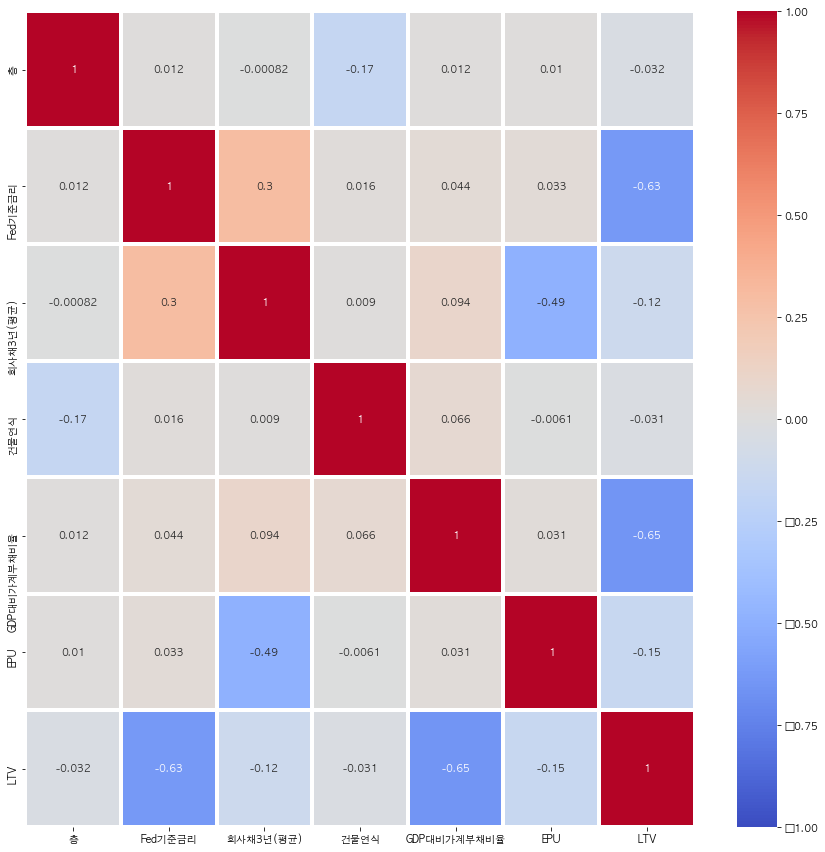

In [35]:
plot_cor(X_scaled)

# LinearRegression

## CV - R2, MSE

In [36]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [37]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.14474,           Validation Score_r2 = -0.00804
      Train Score_mse = 0.04888,           Validation Score_mse = 0.04159


Fold 2: Train Score_r2 = 0.17275,           Validation Score_r2 = -0.03433
      Train Score_mse = 0.0482,           Validation Score_mse = 0.04438


Fold 3: Train Score_r2 = 0.18373,           Validation Score_r2 = 0.01747
      Train Score_mse = 0.04754,           Validation Score_mse = 0.04593


Fold 4: Train Score_r2 = 0.18977,           Validation Score_r2 = -0.27418
      Train Score_mse = 0.04307,           Validation Score_mse = 0.08049


Fold 5: Train Score_r2 = 0.10059,           Validation Score_r2 = -0.00439
      Train Score_mse = 0.04636,           Validation Score_mse = 0.06136


CV 평균 R2 : -0.0607
CV 평균 MSE : 0.0548


## 평가지표 train and test 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


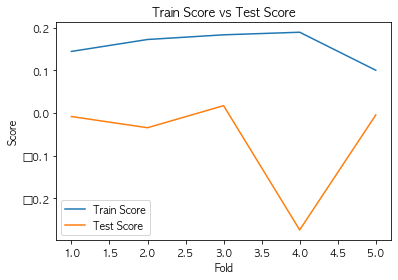

In [38]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

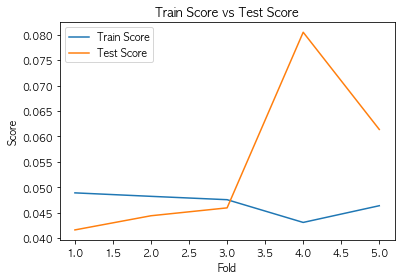

In [39]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정

- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 세 번째로 확정

In [40]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][2].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.086, RMSE :  0.294, MAE: 0.294
Variance score :  0.180




In [41]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][2].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
층,0.385513
GDP대비가계부채비율,0.063350
회사채3년(평균),0.024119
EPU,-0.053357
건물연식,-0.126260
Fed기준금리,-0.157998
LTV,-0.255577


# Ridge & Lasso

## Ridge

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


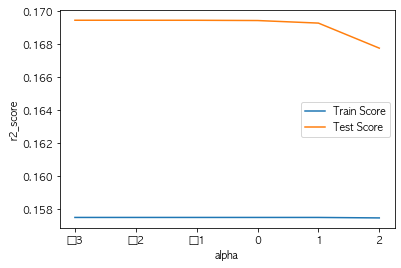

In [42]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

## CV

In [43]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.14474,           Validation Score_r2 = -0.00801
      Train Score_mse = 0.04888,           Validation Score_mse = 0.04159


Fold 2: Train Score_r2 = 0.17275,           Validation Score_r2 = -0.0343
      Train Score_mse = 0.0482,           Validation Score_mse = 0.04438


Fold 3: Train Score_r2 = 0.18373,           Validation Score_r2 = 0.01749
      Train Score_mse = 0.04754,           Validation Score_mse = 0.04593


Fold 4: Train Score_r2 = 0.18977,           Validation Score_r2 = -0.27403
      Train Score_mse = 0.04307,           Validation Score_mse = 0.08048


Fold 5: Train Score_r2 = 0.10059,           Validation Score_r2 = -0.00386
      Train Score_mse = 0.04636,           Validation Score_mse = 0.06133


CV 평균 R2 : -0.0605
CV 평균 MSE : 0.0547


## 평가지표 train and test 차이 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


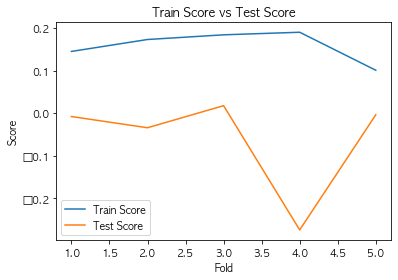

In [44]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [45]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.15745799010842287
0.16942531785009507


In [46]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.088, RMSE :  0.296, MAE: 0.296
Variance score :  0.169




In [47]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][2].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.086, RMSE :  0.294, MAE: 0.294
Variance score :  0.180




In [48]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][2].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
층,0.385322
GDP대비가계부채비율,0.063386
회사채3년(평균),0.024107
EPU,-0.053346
건물연식,-0.126261
Fed기준금리,-0.157963
LTV,-0.255538


In [49]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.12223556156610971


In [50]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True])

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

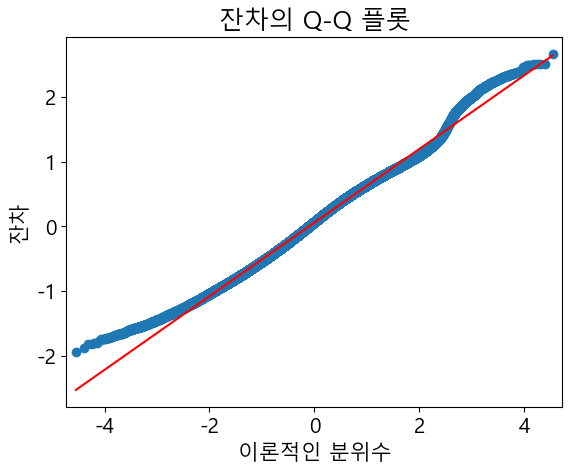

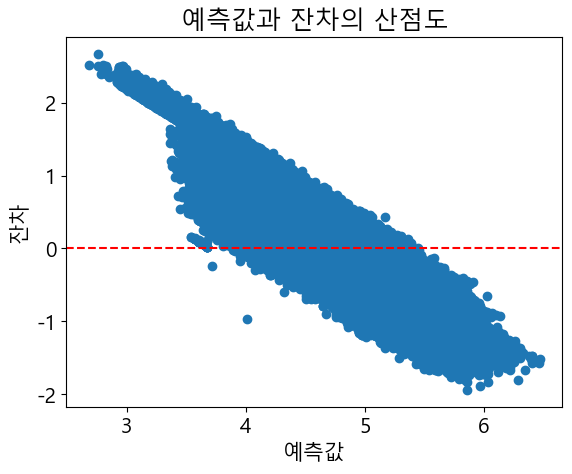

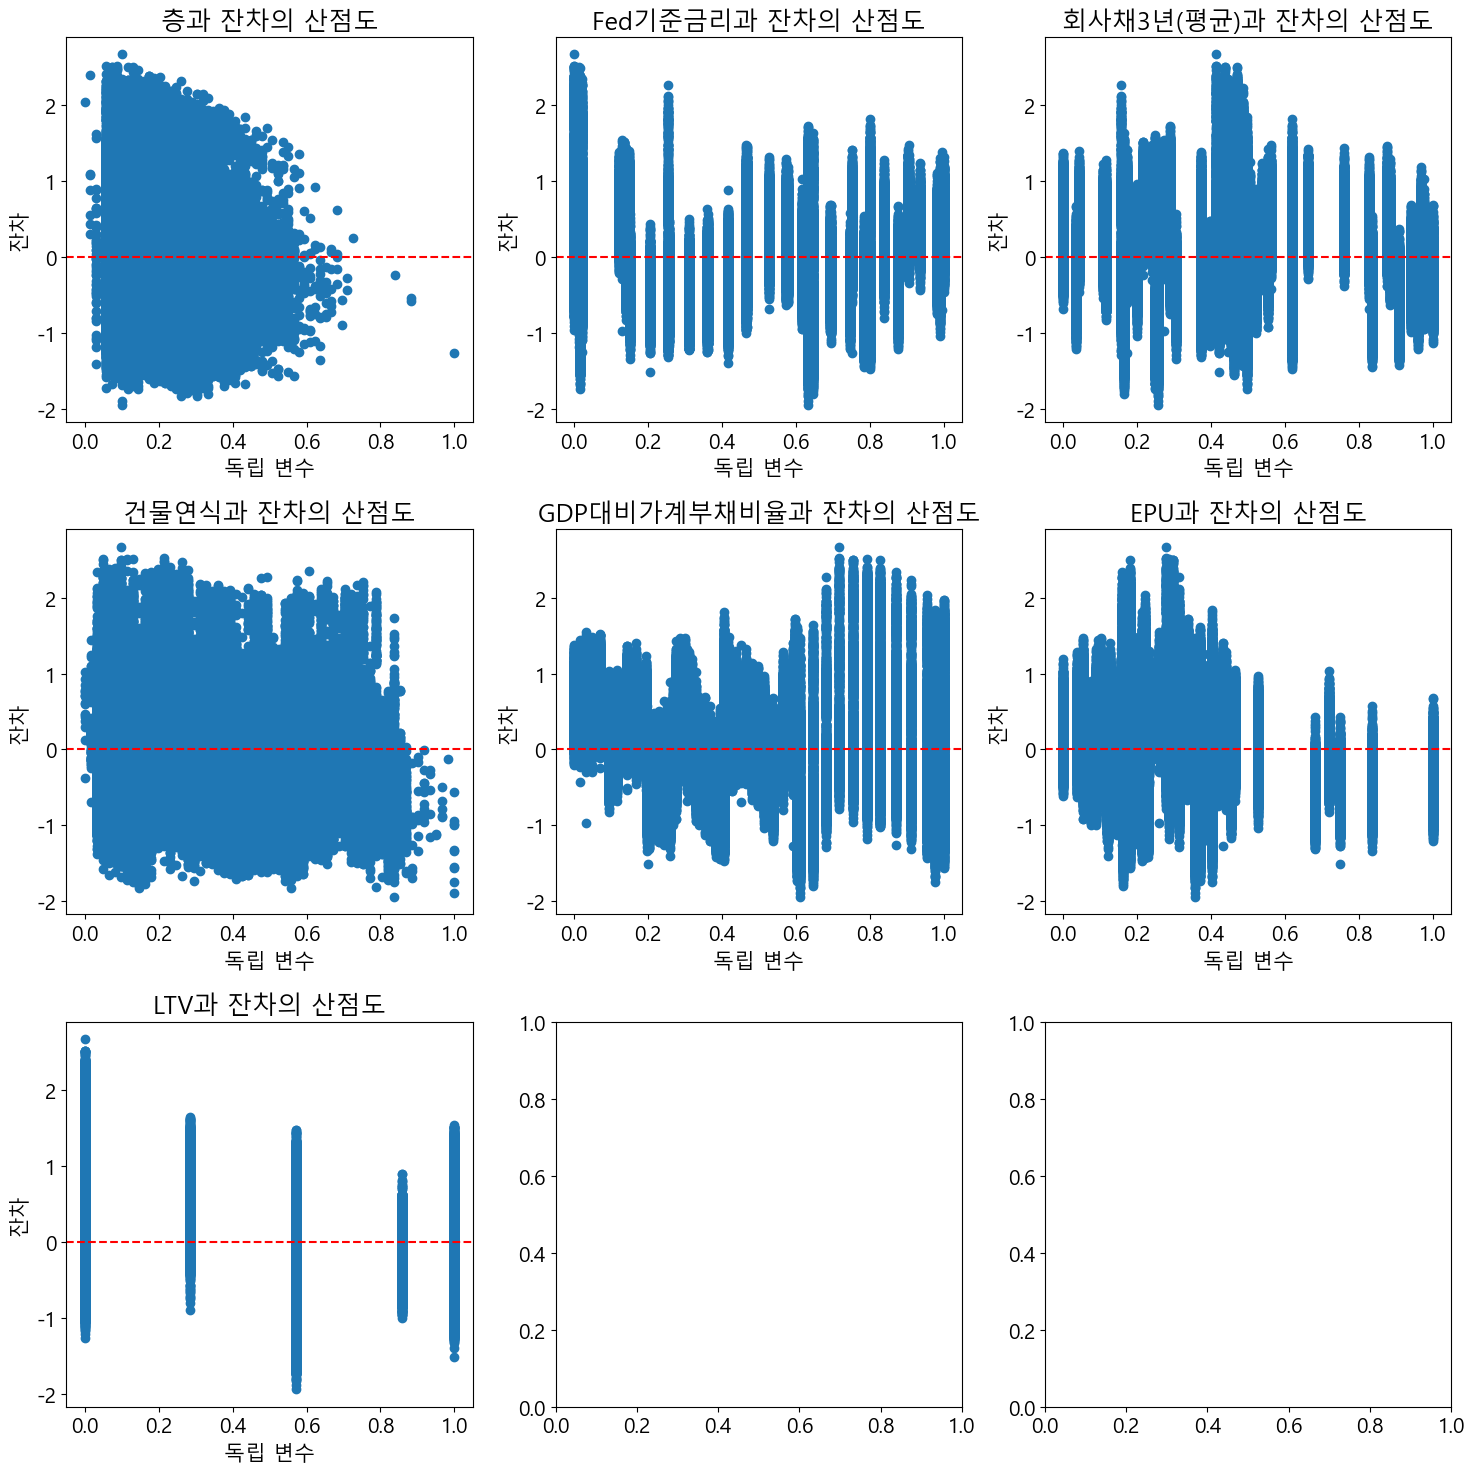

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()